# Author : Aravind shrenivas Murali

# Classification in Python

Classification is the task of predicting a nominal-valued attribute (known as class label) based on the values of other attributes (known as predictor variables). The goals for this tutorial are as follows:
    1. To provide examples of using different classification techniques from the scikit-learn library package.
    2. To demonstrate the problem of model overfitting.

## Artist Dataset :
This Data set provides a detailed record of various artists, their artworks, and associated information such as nationality, gender, race, and counts related to specific museums.

## Problem statement :
Can we predict whether a particular artist is included in Janson's History of Art or Gardner's Art Through the Ages based on the artist's nationality, gender, race, ethnicity, and their exhibition counts at prominent museums (MoMA and The Whitney) by a specific publication year?

I am importing the pandas package and reading the dataset.

In [1]:
from google.colab import files


uploaded = files.upload()

Saving artists.csv to artists (2).csv


In [37]:
import pandas as pd
import io
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

In [3]:
#data = pd.read_csv('artists.csv', header='infer')
data = pd.read_csv(io.BytesIO(uploaded['artists (2).csv']))
data.head()

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White


According to the problem statement, I dropped the unwanted columns and kept only the required data.

In [4]:
columns_to_drop = ['edition_number', 'year', 'space_ratio_per_page_total', 'artist_unique_id', 'artist_race_nwi', 'artist_nationality_other']
df = data.drop(columns=columns_to_drop)
df

,artist_name,artist_nationality,artist_gender,artist_race,artist_ethnicity,book,moma_count_to_year,whitney_count_to_year
0,Aaron Douglas,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0,0
1,Aaron Douglas,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0,0
2,Aaron Douglas,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0,0
3,Aaron Douglas,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0,0
4,Aaron Douglas,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0,0
...,...,...,...,...,...,...,...,...
3149,William Sidney Mount,American,Male,White,Not Hispanic or Latino origin,Janson,0,0
3150,William T. Williams,American,Male,Black or African American,Not Hispanic or Latino origin,Janson,0,2
3151,William T. Williams,American,Male,Black or African American,Not Hispanic or Latino origin,Janson,0,2
3152,William T. Williams,American,Male,Black or African American,Not Hispanic or Latino origin,Janson,0,2


In the next step, I am cleaning the data by removing all the missing value rows from the data frame.

In [5]:
df_cleaned = df.dropna()
print("DataFrame after removing rows with missing values:")
df_cleaned

DataFrame after removing rows with missing values:


,artist_name,artist_nationality,artist_gender,artist_race,artist_ethnicity,book,moma_count_to_year,whitney_count_to_year
0,Aaron Douglas,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0,0
1,Aaron Douglas,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0,0
2,Aaron Douglas,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0,0
3,Aaron Douglas,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0,0
4,Aaron Douglas,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0,0
...,...,...,...,...,...,...,...,...
3149,William Sidney Mount,American,Male,White,Not Hispanic or Latino origin,Janson,0,0
3150,William T. Williams,American,Male,Black or African American,Not Hispanic or Latino origin,Janson,0,2
3151,William T. Williams,American,Male,Black or African American,Not Hispanic or Latino origin,Janson,0,2
3152,William T. Williams,American,Male,Black or African American,Not Hispanic or Latino origin,Janson,0,2


Decision trees accept only integers, so I am assigning binary values and the mapping information is given below.

artist_nationality : American = 0, non - american = 1
artist_gender : Male = 0, Female = 1
artist_race : white = 0, non - white = 1
artist_ethnicity : Hispanic or Latino origin = 0, Not Hispanic or Latino origin = 1

In [6]:
df_cleaned['artist_nationality'].replace({'American': '0'}, inplace=True)
df_cleaned['artist_nationality'].replace(to_replace='^(?!American$).*$', value='1', regex=True, inplace=True)
df_cleaned['artist_gender'].replace({'Male': '0', 'Female': '1'}, inplace=True)
df_cleaned['artist_race'].replace({'White': '0'}, inplace=True)
df_cleaned['artist_race'].replace(to_replace='^(?!White$).*$', value='1', regex=True, inplace=True)
df_cleaned['artist_ethnicity'].replace({'Not Hispanic or Latino origin': '1'}, inplace=True)
df_cleaned['artist_ethnicity'].replace(to_replace='^(?!Not Hispanic or Latino origin$).*$', value='0', regex=True, inplace=True)
df_cleaned['book'].replace({'Gardner': '0', 'Janson': '1'}, inplace=True)
df_cleaned

<ipython-input-6-8019e63d4608>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['artist_nationality'].replace({'American': '0'}, inplace=True)
<ipython-input-6-8019e63d4608>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['artist_nationality'].replace(to_replace='^(?!American$).*$', value='1', regex=True, inplace=True)
<ipython-input-6-8019e63d4608>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['art

,artist_name,artist_nationality,artist_gender,artist_race,artist_ethnicity,book,moma_count_to_year,whitney_count_to_year
0,Aaron Douglas,1,0,1,0,0,0,0
1,Aaron Douglas,1,0,1,0,0,0,0
2,Aaron Douglas,1,0,1,0,0,0,0
3,Aaron Douglas,1,0,1,0,0,0,0
4,Aaron Douglas,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
3149,William Sidney Mount,1,0,1,0,1,0,0
3150,William T. Williams,1,0,1,0,1,0,2
3151,William T. Williams,1,0,1,0,1,0,2
3152,William T. Williams,1,0,1,0,1,0,2


## Decision Tree Classifier :

In this section, we apply a decision tree classifier to the artist dataset described in the previous section.

The commands below involve extracting the predictor attributes (X) and the target class (Y) from the artist dataset. Subsequently, a decision tree classifier object is created, employing entropy as the measure for the splitting criterion. Additionally, the classifier is constrained to generate trees with a maximum depth of 3. The next step involves training the classifier on the labeled data using the `fit()` function.

In [7]:
Y_original = df_cleaned['book']
X_original = df_cleaned.drop(['book','artist_name'],axis=1)


I have splitted the data into training data and testing data in the ratio 80:20. Then I have trained the data and got the predictions.

In [9]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_original, Y_original, test_size=0.2, random_state=42)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X_train_df, y_train_df)

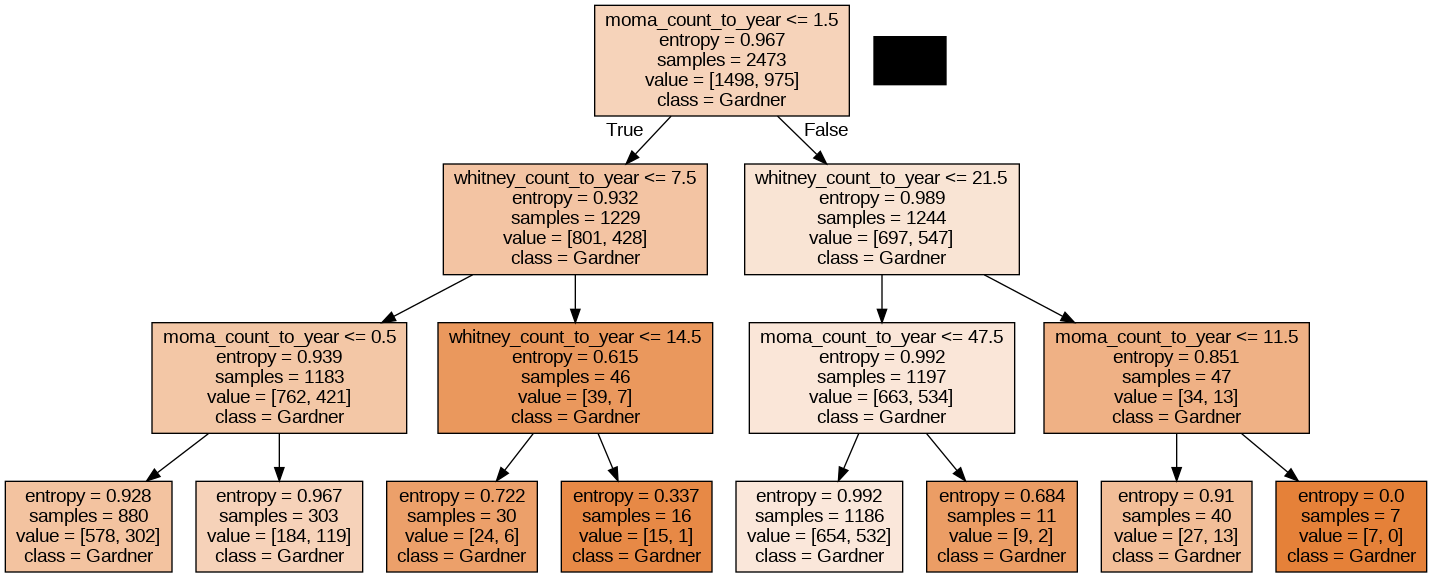

In [10]:
dot_data = tree.export_graphviz(clf, feature_names=X_original.columns, class_names=['Gardner','Janson'], filled=True,
                                out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

The decision tree is used for predicting an artist based on certain features. The root node in the decision tree diagram tests the features such as ‘artist_gender’, and ‘whitney_count_to_year’ in the decision-making process.

In [11]:
predY = clf.predict(X_test_df)
predictions = pd.concat([df_cleaned['artist_name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions.head()

,artist_name,Predicted Class
0,Aaron Douglas,0
1,Aaron Douglas,0
2,Aaron Douglas,0
3,Aaron Douglas,0
4,Aaron Douglas,0


In [12]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test_df, predY)))

Accuracy on test data is 0.62


As we can see from the above output, the accuracy of my model is 62%. We can employ try various models and techniques to improve the accuracy.

## Model Overfitting :

To illustrate the challenge of model overfitting, consider a two-dimensional dataset consisting of 1500 labeled instances. Each instance is assigned to one of two classes, 0 or 1, generated as follows:

1. Instances belonging to class 1 are generated from a mixture of 3 Gaussian distributions centered at [6,14], [10,6], and [14,14], respectively.
2. Instances in class 0 are created through a uniform distribution within a square region, with sides measuring 20 units in length.

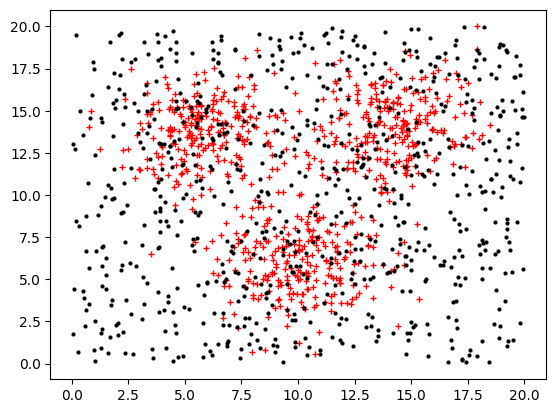

In [13]:
N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

In this code, I take 80% of the labeled data for training and the remaining 20% for testing. We then fit decision trees of different maximum depths (from 2 to 50) to the training set and plot their respective accuracies when applied to the training and test sets.

Text(0, 0.5, 'Accuracy')

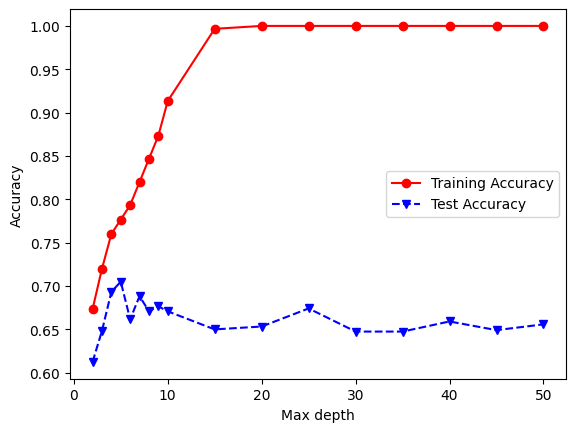

In [14]:
#########################################
# Training and Test set creation
#########################################

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

The plot indicates that the training accuracy will keep improving with an increase in the depth of the tree. However, the test accuracy exhibits an initial improvement up to a maximum depth of 5, beyond which it gradually declines, attributed to the phenomenon of model overfitting.

## Alternative Classification Techniques

We will look at other classification techniques such as,
    1. K-Nearest neighbor classifier
    2. Linear classifiers
    3. Nonlinear Support Vector Machine
    4. Ensemble Methods

I will use the artist dataset for the demonstration.

We have already made the test, train split. So I will proceed with the model formation and prediction.

In [15]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_df, y_train_df)

## K-Nearest neighbor classifier

K-nearest neighbors (K-NN) is a machine learning algorithm that classifies or predicts a data point's label based on the majority class of its nearest neighbors in the feature space. It operates on the principle that similar data points tend to belong to the same class. The "K" represents the number of neighbors considered, and the algorithm is versatile for both classification and regression tasks.

In [53]:
# Initialize the KNN classifier for original training data
knn_classifier_original = KNeighborsClassifier(n_neighbors=3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

I opted for a \(k\) value of 3 in the K-nearest neighbors algorithm because, regardless of the \(k\) value chosen, the accuracy remained consistently negligible.

I've performed the train-test split previously, and I'm utilizing the same split for fitting the model and computing accuracy on the original dataset.

In [54]:
# Train the model on the original training data
knn_classifier_original.fit(X_train_df, y_train_df)

# Make predictions on the test set
y_pred_original = knn_classifier_original.predict(X_test_df)

# Evaluate the model on the original test set
accuracy_original = accuracy_score(y_test_df, y_pred_original)
print(f'Original Test Set Accuracy: {accuracy_original}')

Original Test Set Accuracy: 0.5024232633279483



I am resampling the data and getting the accuracy of the resampled data. I am doing this because it will help in balancing my training data and result in accurate accuracy.


In [46]:
# Train the model on the resampled data
knn_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_resampled = knn_classifier.predict(X_test_df)

# Evaluate the model on the resampled test set
accuracy_resampled = accuracy_score(y_test_df, y_pred_resampled)
print(f'Resampled Test Set Accuracy: {accuracy_resampled}')

Resampled Test Set Accuracy: 0.47334410339256866


In [59]:
# Collect training and testing accuracy scores during training
train_accuracy_scores = []
test_accuracy_scores = []

for k in range(1, 21):  # Varying the number of neighbors from 1 to 20 for example
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_resampled, y_resampled)

    # Training accuracy
    train_accuracy = accuracy_score(y_resampled, knn_classifier.predict(X_resampled))
    train_accuracy_scores.append(train_accuracy)

    # Testing accuracy
    test_accuracy = accuracy_score(y_test_df, knn_classifier.predict(X_test_df))
    test_accuracy_scores.append(test_accuracy)

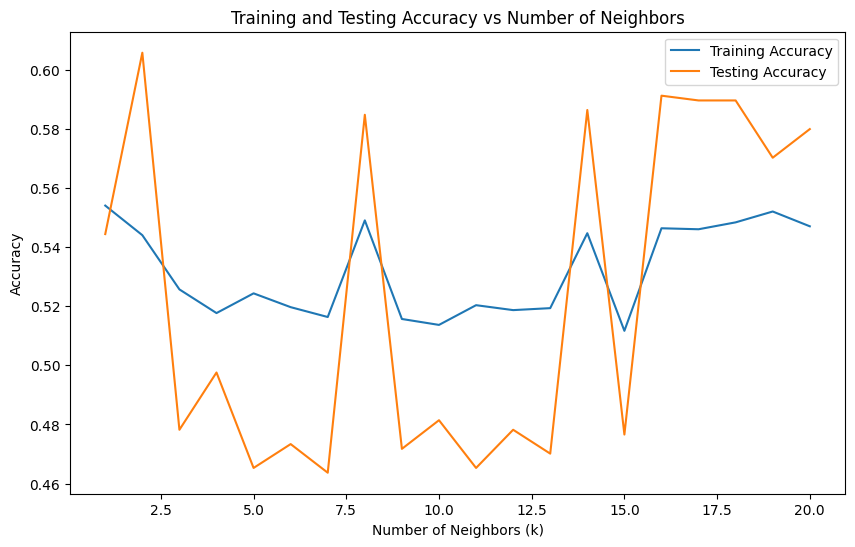

In [60]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accuracy_scores, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracy_scores, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Number of Neighbors')
plt.legend()
plt.show()

The fluctuations in training and testing accuracy plots are so high. which indicates that there is a high possibility of our model being sensitive to small changes while training. One another reason might be the noise present in the data while training the model.

## Linear classifiers

Linear classifiers such as logistic regression and support vector machine (SVM) constructs a linear separating hyperplane to distinguish instances from different classes.

Logistic Regression is used for binary and multiclass classification tasks. It models the probability of belonging to a particular class based on linear combinations of input features, applying the logistic function to produce class probabilities.

In [26]:
# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression()

In [27]:
# Train the model on the original training data
logreg_classifier.fit(X_train_df, y_train_df)

# Make predictions on the test set
y_pred_original = logreg_classifier.predict(X_test_df)

# Evaluate the model on the original test set
accuracy_original = accuracy_score(y_test_df, y_pred_original)
print(f'Original Test Set Accuracy: {accuracy_original}')

Original Test Set Accuracy: 0.617124394184168


In [28]:
# Train the model on the resampled data
logreg_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_resampled = logreg_classifier.predict(X_test_df)

# Evaluate the model on the resampled test set
accuracy_resampled = accuracy_score(y_test_df, y_pred_resampled)
print(f'Resampled Test Set Accuracy: {accuracy_resampled}')

Resampled Test Set Accuracy: 0.5945072697899838


In [29]:
# Collect training and testing accuracy scores during training
train_accuracy_scores = []
test_accuracy_scores = []

In [30]:
for c in [0.001, 0.01, 0.1, 1, 10, 100]:  # Varying the regularization parameter for example
    # Initialize the Logistic Regression classifier with different parameters
    logreg_classifier = LogisticRegression(C=c)

    # Train the model on the resampled data
    logreg_classifier.fit(X_resampled, y_resampled)

    # Training accuracy
    train_accuracy = accuracy_score(y_resampled, logreg_classifier.predict(X_resampled))
    train_accuracy_scores.append(train_accuracy)

    # Testing accuracy
    test_accuracy = accuracy_score(y_test_df, logreg_classifier.predict(X_test_df))
    test_accuracy_scores.append(test_accuracy)

In the above code, a logistic regression classifier is trained on the resampled data for varying values of the regularization parameter \(C\). The loop iterates over a range of \(C\) values, and for each iteration, the model is fitted using the resampled training data. The training and testing accuracies are computed and stored in separate lists. Through this we can evaluate how different regularization strengths impact the model's performance on both the resampled training set and the original testing set.

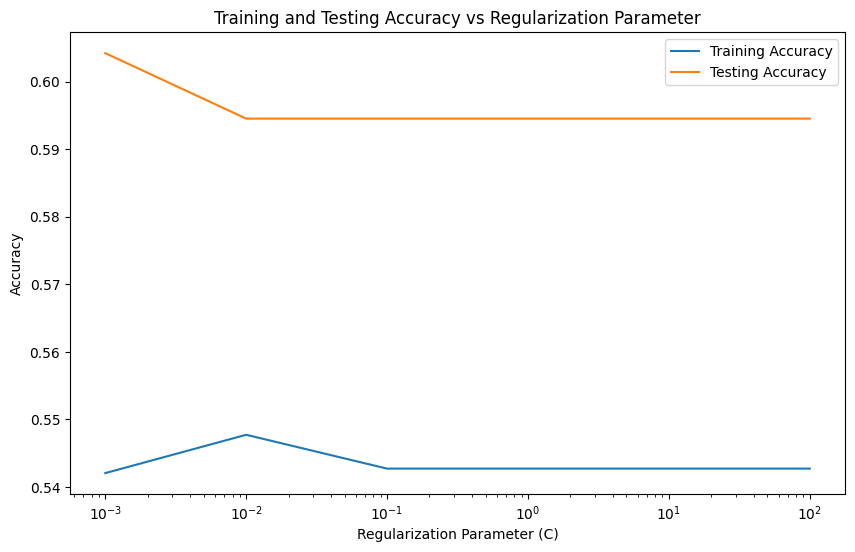

In [31]:
# Plotting
plt.figure(figsize=(10, 6))
regularization_params = [0.001, 0.01, 0.1, 1, 10, 100]

plt.plot(regularization_params[:len(train_accuracy_scores)], train_accuracy_scores, label='Training Accuracy')
plt.plot(regularization_params[:len(test_accuracy_scores)], test_accuracy_scores, label='Testing Accuracy')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Regularization Parameter')
plt.legend()
plt.show()


From the above plot we can infer that testing accuracy is greater than training accuracy, which signifies that the model is overfitting.

## Nonlinear Support Vector Machine

Support Vector Machine (SVM) works by finding an optimal hyperplane that best separates data points of different classes in a high-dimensional space. By maximizing the margin between classes, SVM achieves generalization and can handle complex, nonlinear relationships through the use of kernel functions. SVM is particularly effective in scenarios with high-dimensional feature spaces and clear class boundaries.

In [32]:
# Initialize the Support Vector Machine with RBF kernel
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

The RBF kernel, also called as gaussian kernel is used to transform input data into a higher-dimensional space, enabling SVM to efficiently capture complex, nonlinear relationships.

In [33]:
# Train the model on the original training data
svm_classifier.fit(X_train_df, y_train_df)

# Make predictions on the test set
y_pred_original = svm_classifier.predict(X_test_df)

# Evaluate the model on the original test set
accuracy_original = accuracy_score(y_test_df, y_pred_original)
print(f'Original Test Set Accuracy: {accuracy_original}')

Original Test Set Accuracy: 0.6138933764135702


In [34]:
# Train the model on the resampled data
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_resampled = svm_classifier.predict(X_test_df)

# Evaluate the model on the resampled test set
accuracy_resampled = accuracy_score(y_test_df, y_pred_resampled)
print(f'Resampled Test Set Accuracy: {accuracy_resampled}')

Resampled Test Set Accuracy: 0.5993537964458805


In [35]:
# Collect training and testing accuracy scores during training
train_accuracy_scores = []
test_accuracy_scores = []

for c in [0.001, 0.01, 0.1, 1, 10, 100]:  # Varying the regularization parameter for example
    # Initialize the SVM classifier with RBF kernel and different parameters
    svm_classifier = SVC(kernel='rbf', C=c, gamma='scale')

    # Train the model on the resampled data
    svm_classifier.fit(X_resampled, y_resampled)

    # Training accuracy
    train_accuracy = accuracy_score(y_resampled, svm_classifier.predict(X_resampled))
    train_accuracy_scores.append(train_accuracy)

    # Testing accuracy
    test_accuracy = accuracy_score(y_test_df, svm_classifier.predict(X_test_df))
    test_accuracy_scores.append(test_accuracy)

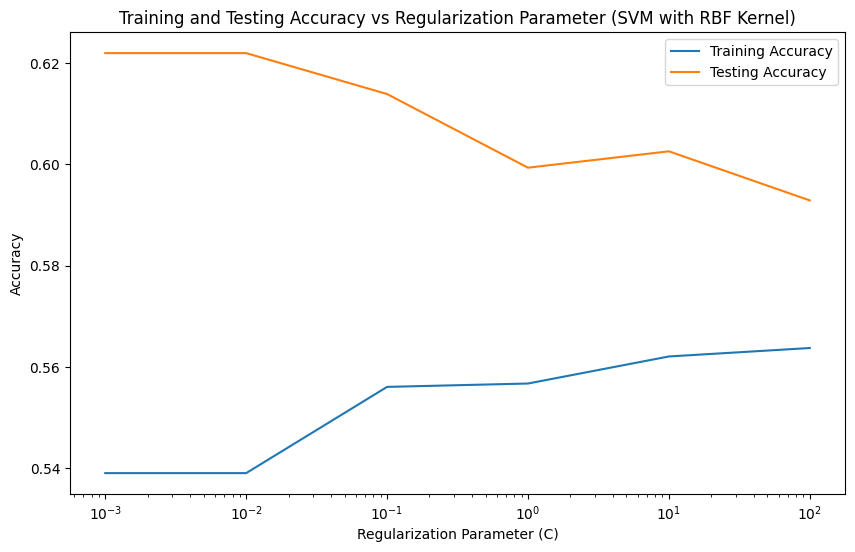

In [36]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], train_accuracy_scores, label='Training Accuracy')
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], test_accuracy_scores, label='Testing Accuracy')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Regularization Parameter (SVM with RBF Kernel)')
plt.legend()
plt.show()

As we can see in the plot above, we can observe that SVM performs better than logistic regression, even tough it is overfitting.

Out of all the models we trained for the artist dataset, we got accuracy of 62% when working with decision trees, which is the maximum out of all.

## Enseble Methods

An ensemble classifier is a model that combines the predictions of multiple individual models to make a more accurate prediction. Instead of relying on a single model, an ensemble classifier combines the opinions of multiple models, resulting in improved performance and generalization.

We are considering 3 types of ensemble classifiers in this example: bagging, boosting, and random forest.

We are going to use the artist dataset, fit 3 models and get their accuracies, then compare them.

In [40]:
numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train_df, y_train_df)

RandomForestClassifier(n_estimators=500)

In [41]:
Y_predTrain = clf.predict(X_train_df)
Y_predTest = clf.predict(X_test_df)
trainAcc.append(accuracy_score(y_train_df, Y_predTrain))
testAcc.append(accuracy_score(y_test_df, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train_df, y_train_df)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  n_estimators=500)

In [42]:
Y_predTrain = clf.predict(X_train_df)
Y_predTest = clf.predict(X_test_df)
trainAcc.append(accuracy_score(y_train_df, Y_predTrain))
testAcc.append(accuracy_score(y_test_df, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train_df, y_train_df)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=500)

[Text(1.5, 0, 'Random Forest'),
 Text(2.5, 0, 'Bagging'),
 Text(3.5, 0, 'AdaBoost')]

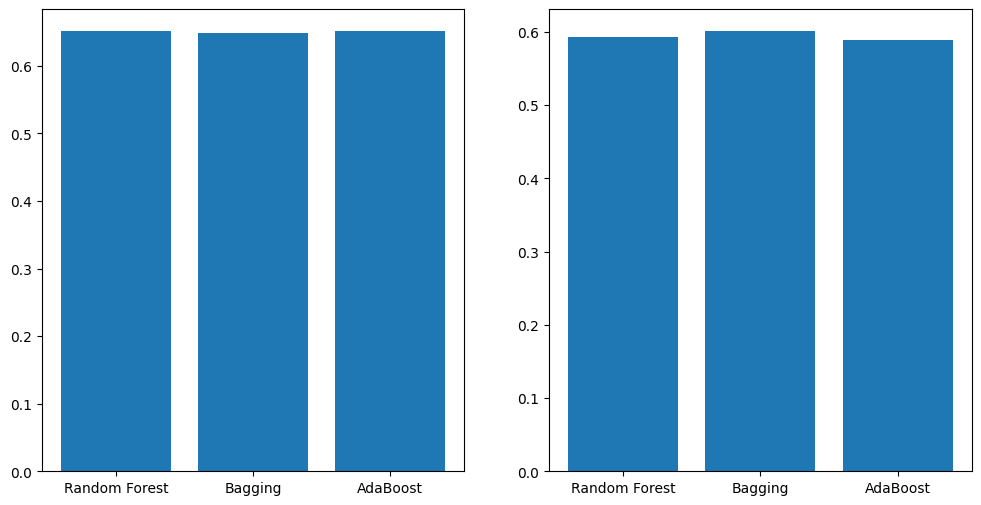

In [43]:
Y_predTrain = clf.predict(X_train_df)
Y_predTest = clf.predict(X_test_df)
trainAcc.append(accuracy_score(y_train_df, Y_predTrain))
testAcc.append(accuracy_score(y_test_df, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

We can see that accuracies have increased in the second plot. It's a negligible increase but this proves the fact that ensemble models are very effective in classification problems